In [1]:
# import dependencies
#Load and inspect images using the Python Imaging Library (PIL)
from PIL import Image
# import os
import numpy as np
# import cv2
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
# import requests
import pickle
import pandas as pd
# from sklearn.preprocessing import LabelEncoder
import torch
import torchvision.models as models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# importing training data set
path = '../Data/training_xray_images.pkl'
with open(path, 'rb') as file:
    X_train = pickle.load(file)

In [3]:
# read y training labels for images from csv file
y_train = np.loadtxt('../Data/Y_labels/y_training_labels.txt')
# display y_train
y_train

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [4]:
# importing testing data set
path = '../Data/testing_xray_images.pkl'
with open(path, 'rb') as file:
    X_test = pickle.load(file)

In [5]:
# read y testing labels for images from csv file
y_test = np.loadtxt('../Data/Y_labels/y_testing_labels.txt')
# display y_train
y_test

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])

In [6]:
# define x shape
X_shape = X_train[0].shape
# print shape
X_shape

(224, 224, 1)

In [7]:
# Convert values to numpy arrays
X_train = np.array(X_train)
X_test= np.array(X_test)
y_train= np.array(y_train)
y_test= np.array(y_test)

In [8]:
# Reshape test data for the model
X_test_np = []
for img in X_test:
    # Add a channel dimension for grayscale images
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    # Append the image to the list
    X_test_np.append(img)

# Convert to numpy array
X_test_np = np.array(X_test_np)

# Check the shape of the first image
#X_test_np[0].shape

In [15]:
# define input shape
input_shape = X_test_np[0].shape
# Define CNN model
model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='sigmoid')  # 5 classes of images
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32#64
epochs = 6
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs
)

Epoch 1/6
424/424 ━━━━━━━━━━━━━━━━━━━━ 128s 301ms/step - accuracy: 0.6809 - loss: 0.9287 - val_accuracy: 0.9277 - val_loss: 0.2360
Epoch 2/6
424/424 ━━━━━━━━━━━━━━━━━━━━ 123s 289ms/step - accuracy: 0.9383 - loss: 0.1794 - val_accuracy: 0.9528 - val_loss: 0.1657
Epoch 3/6
424/424 ━━━━━━━━━━━━━━━━━━━━ 123s 289ms/step - accuracy: 0.9763 - loss: 0.0733 - val_accuracy: 0.9292 - val_loss: 0.3349
Epoch 4/6
424/424 ━━━━━━━━━━━━━━━━━━━━ 124s 293ms/step - accuracy: 0.9832 - loss: 0.0475 - val_accuracy: 0.9336 - val_loss: 0.2987
Epoch 5/6
424/424 ━━━━━━━━━━━━━━━━━━━━ 126s 296ms/step - accuracy: 0.9858 - loss: 0.0463 - val_accuracy: 0.9499 - val_loss: 0.2420
Epoch 6/6
424/424 ━━━━━━━━━━━━━━━━━━━━ 126s 298ms/step - accuracy: 0.9918 - loss: 0.0286 - val_accuracy: 0.9720 - val_loss: 0.1564


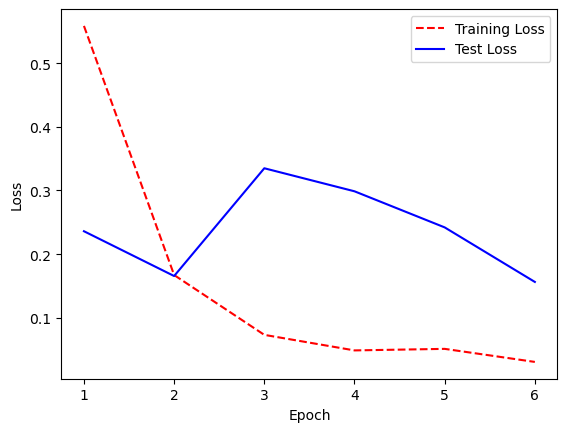

In [16]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

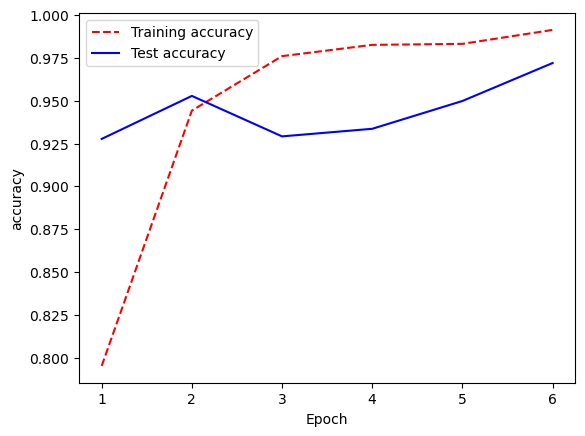

In [17]:
# Get training and test accracy histories
training_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)
# Visualize accuracy history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training accuracy', 'Test accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show();
plt.show()

In [23]:
# Save the entire model
model.save('model.keras')

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step


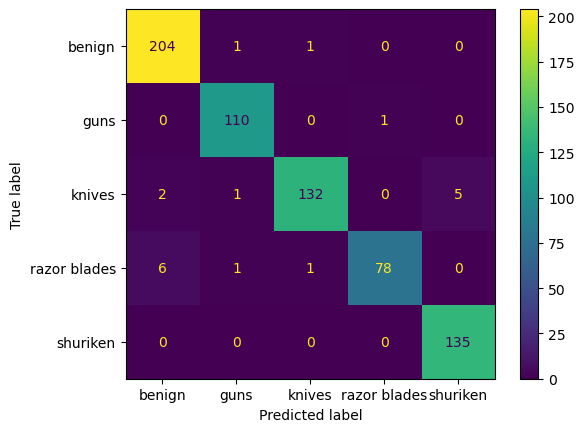

In [19]:
predictions = model.predict(X_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
# Display the confusion matrix
label_names = ['benign','guns','knives','razor blades','shuriken']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=label_names)
disp.plot()
plt.show()

In [28]:
X_test[20].shape

(224, 224)